In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

df = pd.read_excel('Insurance and Medical Costs Data.xlsx')

df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
#B. Data Cleaning
# Get basic information about the dataset
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

df = df.drop_duplicates()
# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicate Rows: 0


In [4]:
#B Encoding Variables
# Convert categorical variables into numerical format
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Mapping male to 0, female to 1
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})  # Mapping smoker 'yes' to 1, 'no' to 0

# One-hot encoding for the 'region' column
df = pd.get_dummies(df, columns=['region'], drop_first=True)  # Drop first category to avoid multicollinearity

# Display updated dataframe
df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


Original dataset shape: (1337, 9)
Dataset shape after outlier removal: (1190, 9)


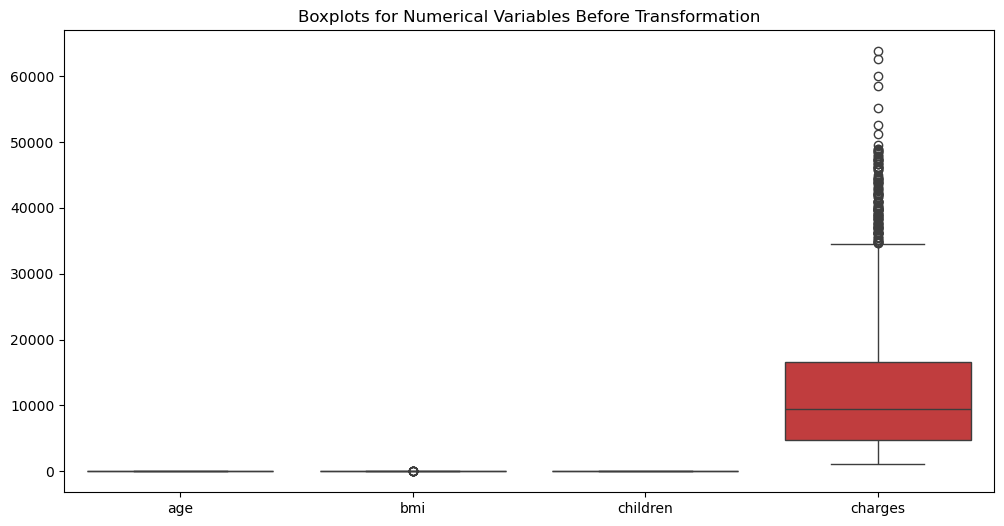

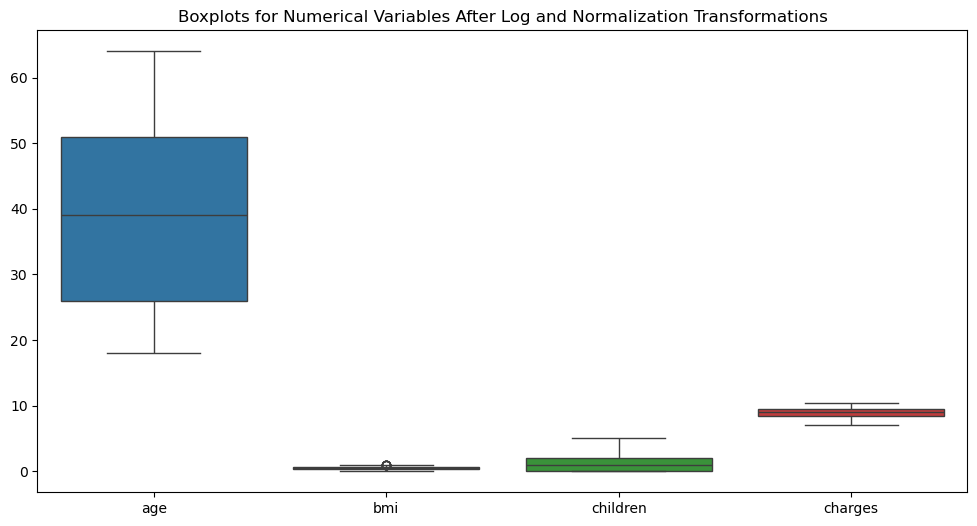


Outliers in Charges after transformation:
 Empty DataFrame
Columns: [charges]
Index: []

Outliers in BMI after transformation:
            bmi
438   1.000000
454   0.992855
547   0.998376
660   0.992855
930   0.992855
941   0.978564
1131  0.972394


In [5]:
#C Data Extraction and Preperation
# Function to remove outliers using Interquartile Range (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'bmi' and 'charges' columns
df_cleaned = remove_outliers(df, 'bmi')
df_cleaned = remove_outliers(df_cleaned, 'charges')

# Apply log transformation to 'charges' to reduce skewness
df_cleaned['charges'] = np.log(df_cleaned['charges'])

# Apply Min-Max Normalization to 'bmi' for better scaling
df_cleaned['bmi'] = (df_cleaned['bmi'] - df_cleaned['bmi'].min()) / (df_cleaned['bmi'].max() - df_cleaned['bmi'].min())

# Display the shape of dataset before and after outlier removal
print("Original dataset shape:", df.shape)
print("Dataset shape after outlier removal:", df_cleaned.shape)

# Plot boxplots before transformation
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.title("Boxplots for Numerical Variables Before Transformation")
plt.show()

# Plot boxplots after log and normalization transformations
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned[['age', 'bmi', 'children', 'charges']])
plt.title("Boxplots for Numerical Variables After Log and Normalization Transformations")
plt.show()

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[[column]]

# Identify outliers in 'charges' and 'bmi' after transformations
charges_outliers = detect_outliers(df_cleaned, 'charges')
bmi_outliers = detect_outliers(df_cleaned, 'bmi')

# Display first 10 outlier values
print("\nOutliers in Charges after transformation:\n", charges_outliers.head(10))
print("\nOutliers in BMI after transformation:\n", bmi_outliers.head(10))


In [6]:
# Display the first 10 rows after encoding categorical variables
print("First 10 Rows of the Encoded Data:")
print(df.head(10))


First 10 Rows of the Encoded Data:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    1  27.900         0       1  16884.92400             False   
1   18    0  33.770         1       0   1725.55230             False   
2   28    0  33.000         3       0   4449.46200             False   
3   33    0  22.705         0       0  21984.47061              True   
4   32    0  28.880         0       0   3866.85520              True   
5   31    1  25.740         0       0   3756.62160             False   
6   46    1  33.440         1       0   8240.58960             False   
7   37    1  27.740         3       0   7281.50560              True   
8   37    0  29.830         2       0   6406.41070             False   
9   60    1  25.840         0       0  28923.13692              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3           

In [ ]:
#D. Data Analysis - model training & evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target from the cleaned data
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

# 1. Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results["Linear Regression"] = {"MSE": mean_squared_error(y_test, y_pred_lr), "R2": r2_score(y_test, y_pred_lr)}

# 2. Tuned Gradient Boosting via GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gbr = grid_search.best_estimator_
y_pred_best = best_gbr.predict(X_test)
results["Tuned Gradient Boosting"] = {"MSE": mean_squared_error(y_test, y_pred_best), "R2": r2_score(y_test, y_pred_best)}

# 3. Polynomial Regression (Degree 2)
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)
results["Polynomial Regression"] = {"MSE": mean_squared_error(y_test, y_pred_poly), "R2": r2_score(y_test, y_pred_poly)}

# 4. Stacking Regressor (Combining LR, Polynomial, and Tuned GBR)
estimators = [
    ('lr', LinearRegression()),
    ('poly', Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear', LinearRegression())
    ])),
    ('gbr', best_gbr)
]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), cv=5)
stacking_regressor.fit(X_train, y_train)
y_pred_stack = stacking_regressor.predict(X_test)
results["Stacking Regressor"] = {"MSE": mean_squared_error(y_test, y_pred_stack), "R2": r2_score(y_test, y_pred_stack)}

# Print a summary of the results
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.4f}, R² = {metrics['R2']:.4f}")


Linear Regression: MSE = 0.2029, R² = 0.6531
Tuned Gradient Boosting: MSE = 0.1957, R² = 0.6655
Polynomial Regression: MSE = 0.1923, R² = 0.6713
Stacking Regressor: MSE = 0.1901, R² = 0.6751
